In [1]:
import torch
import torchbearer
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import numpy as np
import pickle
from torchbearer.callbacks import LiveLossPlot
from itertools import product
from scipy.ndimage import gaussian_filter
import numpy as np
from matplotlib import pyplot as plt
import random
import torch.nn.functional as F
from torch import nn

In [2]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

In [4]:
# RE-RUN CELL TO RESET DISTORTIONS MADE TO MNIST DATASET #

# load MNIST data into training and test sets
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)
trainset.data = trainset.data[0:27105]
trainset.targets = trainset.targets[0:27105]

# Create the data loaders for the training and test sets
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

In [5]:
import torch.nn.functional as F
from torch import nn

# Define the ANN
class NetworkControl(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NetworkControl, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = F.dropout(out, 0.2)        
        out = self.fc2(out)        
        out = F.relu(out)
        out = F.dropout(out, 0.2)        
        out = self.fc3(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out

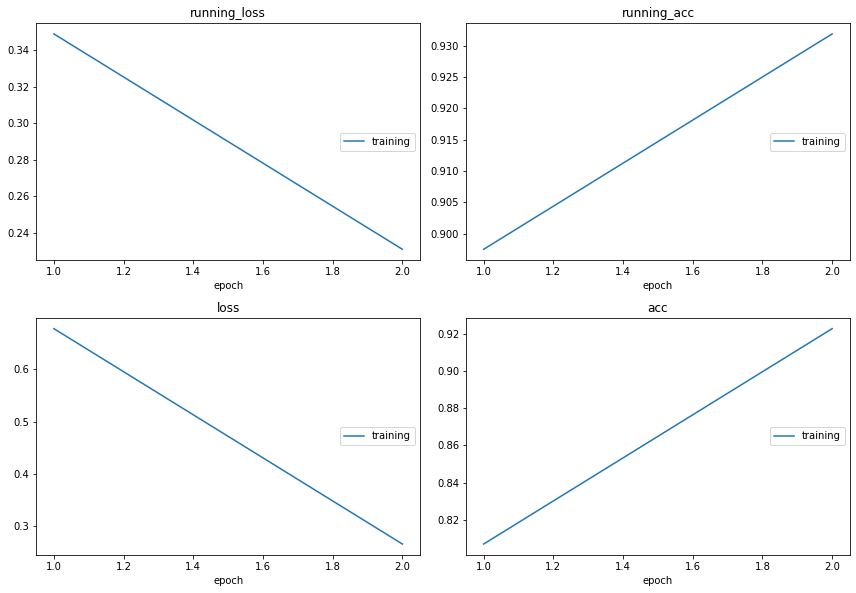

[{'running_loss': 0.3490082323551178,
  'running_acc': 0.8974999785423279,
  'loss': 0.6779637932777405,
  'acc': 0.806972861289978,
  'train_steps': 212,
  'validation_steps': None},
 {'running_loss': 0.23083212971687317,
  'running_acc': 0.9318749904632568,
  'loss': 0.2659999132156372,
  'acc': 0.922781765460968,
  'train_steps': 212,
  'validation_steps': None}]

In [6]:
# initialize control network
model = NetworkControl(784, 1200, 10)

# define the loss function
loss_function = nn.CrossEntropyLoss()
# define the optimiser, learning rate and momentum
optimiser = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

# create a live loss plot of accuracy and loss after each training epoch
plot = LiveLossPlot()

# train the network using model, optimiser and loss function for 2 epochs
trial = torchbearer.Trial(model, optimiser, loss_function, callbacks=[plot], metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)
trial.run(epochs=2)

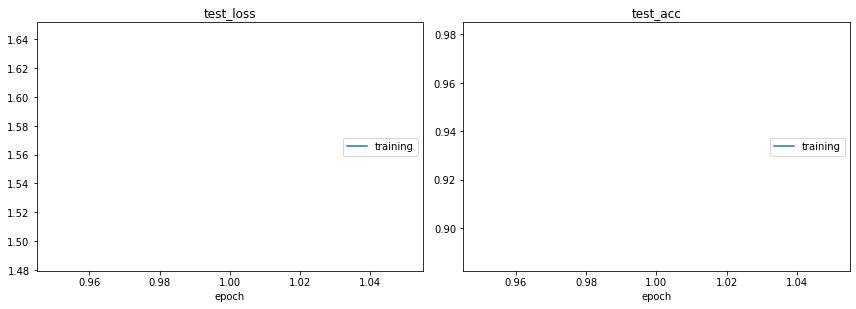

{'test_loss': 1.5655419826507568, 'test_acc': 0.9335999488830566}


In [7]:
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

In [8]:
torch.save(model,'save_ann.pkl')

d:\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type NetworkControl. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
